<a href="https://colab.research.google.com/github/MinakshiLute/Our-play-store-analysis-project-KMNGY/blob/main/individual_Minakshi__playstore_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from IPython.core.application import Unicode
data=pd.read_csv('/content/play_store.data_csv.csv')

In [ ]:
data.shape

(18896, 16)

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [ ]:
data.describe()

,Rating
count,15702.000000
mean,4.165590
std,0.594825
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
data.isna().sum()


App                   0
Category              0
Rating             3194
Reviews               0
Size                  0
Installs              0
Type                  4
Price                 0
Content Rating        4
Genres                0
Last Updated          0
Current Ver          11
Android Ver           6
Unnamed: 13       18894
Unnamed: 14       18894
Unnamed: 15       18894
dtype: int64

In [ ]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Unnamed: 13        object
Unnamed: 14        object
Unnamed: 15        object
dtype: object

In [ ]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,NaN,NaN


In [ ]:
data['Installs']=data['Installs'].apply(lambda x:x.split('+')[0])

In [ ]:
data['Installs']=data['Installs'].apply(lambda x:x.split(',')[0])

In [ ]:
data = data.drop(data[data.Installs== 'Free'].index)

In [ ]:
pd.to_numeric(data['Installs'])
data['Installs'].astype(int)

0         10
1        500
2          5
3         50
4        100
        ... 
18891      5
18892    100
18893      1
18894      1
18895     10
Name: Installs, Length: 18892, dtype: int64

In [ ]:
data['Installs'].head(10)

0     10
1    500
2      5
3     50
4    100
5     50
6     50
7      1
8      1
9     10
Name: Installs, dtype: object

In [ ]:

data['Last Updated']=pd.to_datetime(data['Last Updated'],format='%d-%m-%Y', errors='coerce')

In [ ]:
data['Size']=data['Size'].apply(lambda x:x.split('M')[0])

In [ ]:
data['Size']=data['Size'].apply(lambda x:x.split('k')[0])

In [ ]:
data= data.drop(data[data.Size=='Varies with device'].index)


In [ ]:
pd.to_numeric(data['Size'])
data['Size'].astype(float)

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
18890     9.6
18891    53.0
18892     3.6
18893     9.5
18895    19.0
Name: Size, Length: 16575, dtype: float64

In [ ]:
data['Size'].head(5)

0     19
1     14
2    8.7
3     25
4    2.8
Name: Size, dtype: object

In [ ]:
pd.to_numeric(data['Reviews'])
data['Reviews'].astype(int)

0           159
1           967
2         87510
3        215644
4           967
          ...  
18890         0
18891        38
18892         4
18893         3
18895    398307
Name: Reviews, Length: 16575, dtype: int64

In [ ]:
data['Price']=data['Price'].apply(lambda x:x.split('$')[0])

In [ ]:
pd.to_numeric(data['Price'])
data['Price'] = pd.to_numeric(data['Price'])

In [ ]:
data['Price'].head(5)

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: Price, dtype: float64

In [ ]:
data = data.drop(data[data['Current Ver'].isnull()].index)

In [ ]:
data = data.drop(data[data['Current Ver']=='Varies with device'].index)

In [ ]:
data = data.drop(data[data['Current Ver']=='R6'].index)

In [ ]:
data['Current Ver'] = data['Current Ver'].apply(lambda x:str(x).split('.',1)[0])

In [ ]:
data['Current Ver'].head(5)

0    1
1    2
2    1
4    1
5    1
Name: Current Ver, dtype: object

In [ ]:
data.dropna

<bound method DataFrame.dropna of                                                      App        Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                    Coloring book moana  ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
5                             Paper flowers instructions  ART_AND_DESIGN   
...                                                  ...             ...   
18889                                      FR Calculator          FAMILY   
18890                                           FR Forms        BUSINESS   
18891                                   Sya9a Maroc - FR          FAMILY   
18892                   Fr. Mike Schmitz Audio Teachings          FAMILY   
18893                             Parkinson Exercices FR         MEDICAL   

       Rating Reviews Size Installs  Type  Price Cont

In [ ]:
#df1['birth year'].fillna(-1))
data['Rating'].fillna(0)

0        4.1
1        3.9
2        4.7
4        4.3
5        4.4
        ... 
18889    4.0
18890    0.0
18891    4.5
18892    5.0
18893    0.0
Name: Rating, Length: 16453, dtype: float64

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [ ]:
no_of_review_by_genre=round((data.groupby('Genres')['Reviews'].mean()),2)

In [ ]:
no_of_review_by_category=(data.groupby('Category')['Reviews']).mean()

In [ ]:
no_of_install_by_genre=round((data.groupby('Genres')['Installs'].mean()),2)

In [ ]:
no_of_install_by_category=(data.groupby('Category')['Reviews']).mean()

In [ ]:
no_of_review_by_category_10=no_of_review_by_category.sort_values(ascending=True)[:8]

In [ ]:
no_of_review_by_genre_10=no_of_review_by_genre.sort_values(ascending=True)[:8]

In [ ]:
no_of_review_by_category_10

Category
EVENTS                4.670009e+145
BEAUTY                3.203474e+155
PARENTING             1.446060e+176
COMICS                4.068741e+191
ART_AND_DESIGN        2.221776e+221
LIBRARIES_AND_DEMO    6.202283e+279
HOUSE_AND_HOME        4.748947e+284
AUTO_AND_VEHICLES     3.165171e+288
Name: Reviews, dtype: float64

In [ ]:
no_of_review_by_genre_7=no_of_review_by_genre.sort_values(ascending=True)[3:11]

In [ ]:
no_of_review_by_genre_7

Genres
Role Playing;Education                277.75
Comics;Creativity                     516.00
Card;Brain Games                      685.00
Travel & Local;Action & Adventure     890.00
Music & Audio;Music & Video          1369.00
Art & Design;Action & Adventure      3082.50
Parenting;Brain Games                3614.00
Adventure;Brain Games                7148.00
Name: Reviews, dtype: float64

In [ ]:
no_of_review_by_genre_8=no_of_review_by_genre.sort_values(ascending=True)[:8]

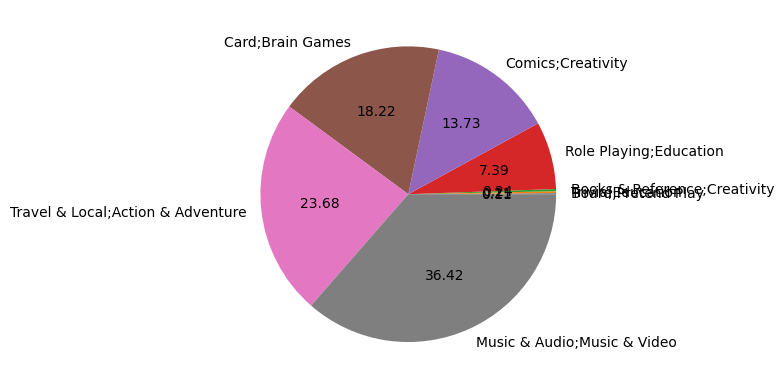

In [ ]:
plt.pie(no_of_review_by_genre_8,autopct='%.2f',labels=no_of_review_by_genre_8.index)
plt.show()

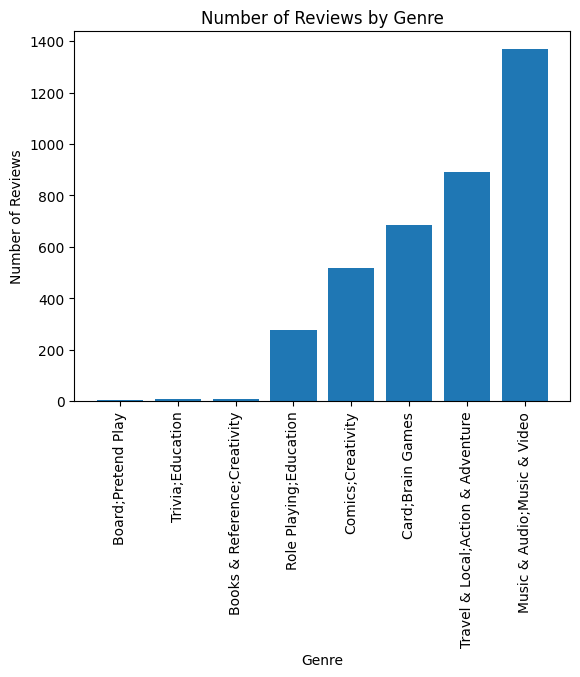

In [ ]:
# Assuming you have already defined the variables 'no_of_review_by_genre_10' and 'no_of_review_by_genre_10.index'


plt.bar(no_of_review_by_genre_10.index, no_of_review_by_genre_10)
plt.xlabel('Genre')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Genre')

# Set the x-axis labels at an angle for better visibility
plt.xticks(rotation=90)

plt.show()



/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:3201: RuntimeWarning: invalid value encountered in true_divide
  x = x / sx


ValueError: ignored

ValueError: ignored

<Figure size 640x480 with 2 Axes>

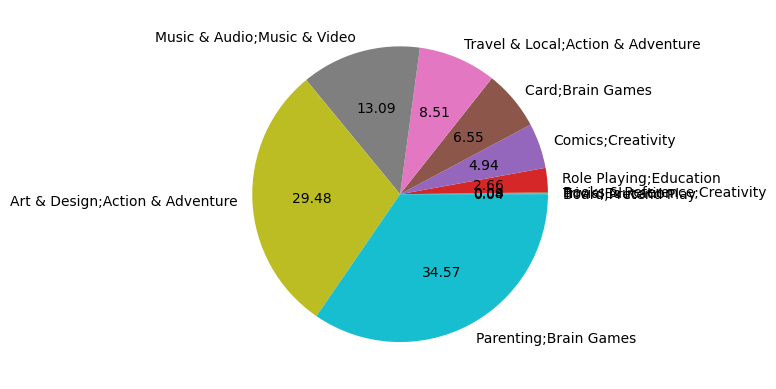

In [ ]:
plt.pie(no_of_review_by_genre_10,autopct='%.2f',labels=no_of_review_by_genre_10.index)
plt.show()



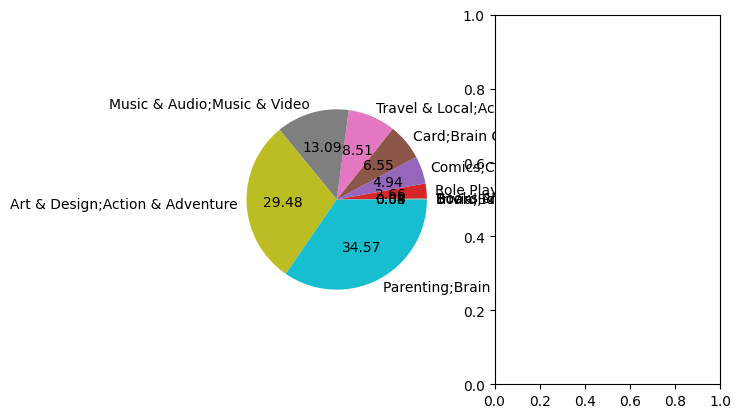

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:3201: RuntimeWarning: invalid value encountered in true_divide
  x = x / sx


ValueError: ignored

ValueError: ignored

<Figure size 640x480 with 1 Axes>

In [ ]:

plt.subplot(1, 2, 1)

plt.pie(no_of_review_by_genre_10,autopct='%.2f',labels=no_of_review_by_genre_10.index)
plt.subplot(1, 2, 2)
plt.show()

plt.pie(no_of_review_by_category_10,autopct='%.2f',labels=no_of_review_by_category_10.index)
plt.subplot(1,2,1)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined the variables 'no_of_review_by_genre_10', 'no_of_review_by_genre_10.index',
# 'no_of_review_by_category_10', and 'no_of_review_by_category_10.index'

plt.subplot(1, 2, 1)
plt.pie(no_of_review_by_genre_10, autopct='%.2f', labels=no_of_review_by_genre_10.index)
plt.title('Reviews by Genre')

plt.subplot(1, 2, 2)
plt.pie(no_of_review_by_category_10, autopct='%.2f', labels=no_of_review_by_category_10.index)
plt.title('Reviews by Category')

plt.show()


ValueError: ignored

ValueError: ignored

<Figure size 640x480 with 2 Axes>

In [ ]:
plt.pie(no_of_review_by_category_10,autopct='%.2f',labels=no_of_review_by_category_10.index)

ValueError: ignored

ValueError: ignored

<Figure size 640x480 with 1 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined the variables 'no_of_review_by_category_10' and 'no_of_review_by_category_10.index'

plt.pie(no_of_review_by_category_10, autopct='%.2f', labels=no_of_review_by_category_10.index)
plt.title('Reviews by Category')

plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:3201: RuntimeWarning: invalid value encountered in true_divide
  x = x / sx


ValueError: ignored

ValueError: ignored

<Figure size 640x480 with 1 Axes>